# Setup

In [ ]:
!pip install datasets -q

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Loading

In [ ]:
from datasets import load_dataset

dataset = load_dataset("kmfoda/booksum")

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 1484
    })
    test: Dataset({
        features: ['bid', 'is_aggregate', 'source', 'chapter_path', 'summary_path', 'book_id', 'summary_id', 'content', 'summary', 'chapter', 'chapter_length', 'summary_name', 'summary_url', 'summary_text', 'summary_analysis', 'summary_length', 'analysis_length'],
        num_rows: 1431
    })
})

In [ ]:
selected_columns = ["chapter", "summary_text"]

for split in dataset:
    dataset[split] = dataset[split].select_columns(selected_columns)

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 1484
    })
    test: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 1431
    })
})

# Data Visualization

In [ ]:
sample = dataset["train"][0]

In [ ]:
print(sample["chapter"])


  "Mine ear is open, and my heart prepared:
  The worst is worldly loss thou canst unfold:
  Say, is my kingdom lost?"

  SHAKESPEARE.


It was a feature peculiar to the colonial wars of North America, that
the toils and dangers of the wilderness were to be encountered before
the adverse hosts could meet. A wide and apparently an impervious
boundary of forests severed the possessions of the hostile provinces of
France and England. The hardy colonist, and the trained European who
fought at his side, frequently expended months in struggling against the
rapids of the streams, or in effecting the rugged passes of the
mountains, in quest of an opportunity to exhibit their courage in a more
martial conflict. But, emulating the patience and self-denial of the
practised native warriors, they learned to overcome every difficulty;
and it would seem that, in time, there was no recess of the woods so
dark, nor any secret place so lovely, that it might claim exemption from
the inroads of those who

In [ ]:
print(sample["summary_text"])

Before any characters appear, the time and geography are made clear. Though it is the last war that England and France waged for a country that neither would retain, the wilderness between the forces still has to be overcome first. Thus it is in 1757, in the New York area between the head waters of the Hudson River and Lake George to the north. Because only two years earlier General Braddock was disgracefully routed by a handful of French and Indians, the frontier is now exposed to real and imaginary savage disasters as well as to the horrors of warfare. Fear has replaced reason. Near dusk of a day in July, an Indian runner named Magua arrives at Fort Edward on the upper Hudson. He has come from Fort William Henry at the southern tip of Lake George with the news that the French General Montcalm is moving south with a very large army and that Munro, commander of Fort William Henry, is in urgent need of plentiful reinforcements from General Webb. Early the next morning, a limited detachm

In [ ]:
print(len(sample["chapter"]))
print(len(sample["summary_text"]))

40844
2218


In [ ]:
def compute_metrics(data):
    return {
        "min": np.min(data),
        "max": np.max(data),
        "mean": np.mean(data),
        "median": np.median(data)
    }

def print_metrics(books):
    for feature in ("chapter", "summary_text"):
        print(feature)
        print("-" * len(feature))

        lengths = [len(text) for text in books[feature]]
        metrics = compute_metrics(lengths)
        for key, value in metrics.items():
            print(key, value, sep = ": ")

        print()

In [ ]:
print_metrics(dataset["train"])

chapter
-------
min: 277
max: 677776
mean: 22618.827708333334
median: 16365.0

summary_text
------------
min: 10
max: 26762
mean: 2129.982395833333
median: 1595.0



In [ ]:
print_metrics(dataset["validation"])

chapter
-------
min: 235
max: 108697
mean: 19357.840296495957
median: 16627.0

summary_text
------------
min: 37
max: 11060
mean: 1775.9427223719676
median: 1358.0



In [ ]:
print_metrics(dataset["test"])

chapter
-------
min: 328
max: 512714
mean: 23152.593990216632
median: 15594.0

summary_text
------------
min: 131
max: 30181
mean: 1858.450034940601
median: 1292.0



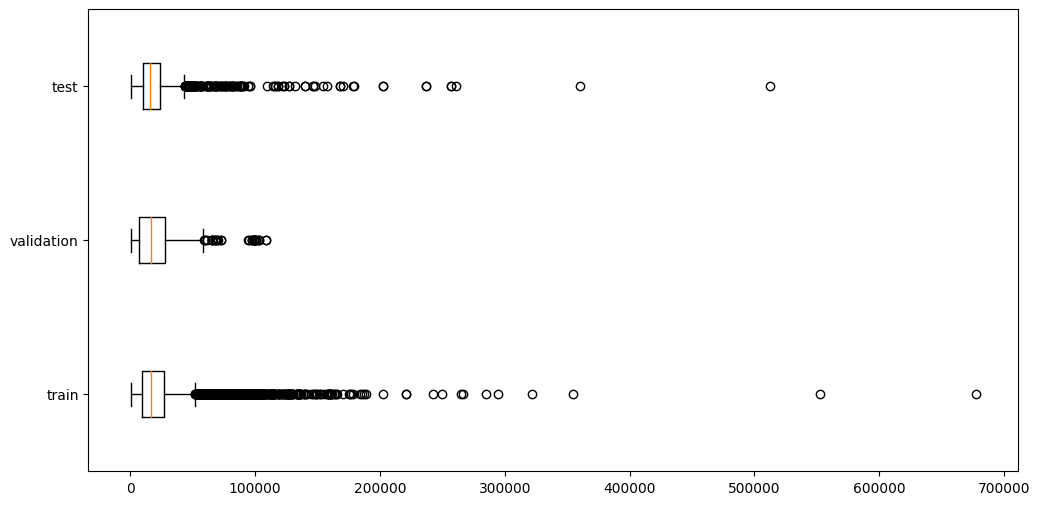

In [ ]:
plt.figure(figsize = (12, 6))
plt.boxplot(
    x = [
        [len(chapter) for chapter in books["chapter"]]
        for books in dataset.values()
    ],
    labels = dataset.keys(),
    vert = False
)
plt.show()

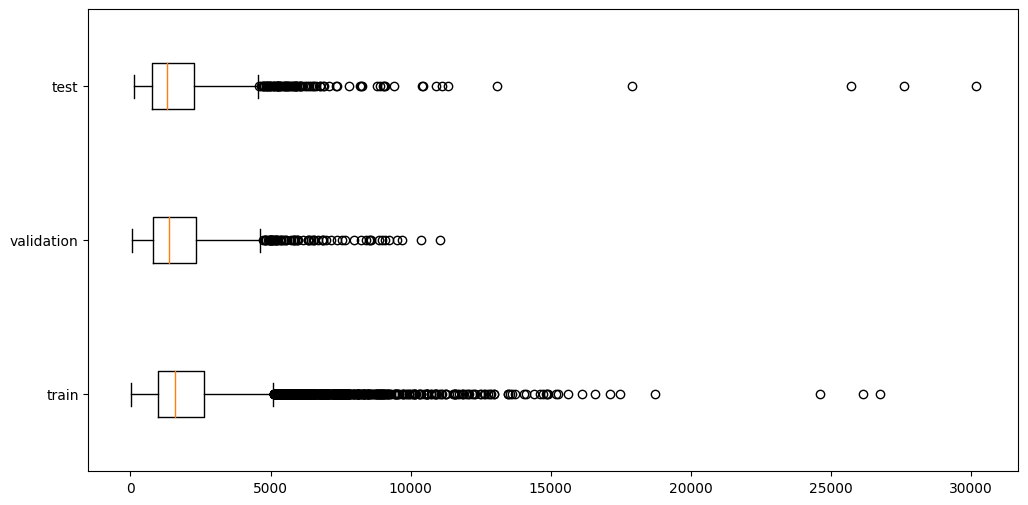

In [ ]:
plt.figure(figsize = (12, 6))
plt.boxplot(
    x = [
        [len(summary) for summary in books["summary_text"]]
        for books in dataset.values()
    ],
    labels = dataset.keys(),
    vert = False
)
plt.show()

# Preprocessing

In [ ]:
from datasets import concatenate_datasets

df = pd.DataFrame(concatenate_datasets(dataset.values()))

df

,chapter,summary_text
0,"\n ""Mine ear is open, and my heart prepared:\...","Before any characters appear, the time and geo..."
1,"\n ""Before these fields were shorn and tilled...",In another part of the forest by the river a f...
2,"\n ""Well, go thy way: thou shalt not from thi...",When the mounted party from Fort Howard approa...
3,"\n ""In such a night\n Di...","The pursuit of Magua is unsuccessful, but Hawk..."
4,"\n ""Those strains that once did sweet in Zion...",Heyward and the girls are uneasy and Gamut is ...
...,...,...
12510,ACT III SCENE I.\n\n--At SIR PETER'S\n\n S...,"Scene I opens again on Sir Oliver, Sir Peter, ..."
12511,SCENE II.\n\n--At CHARLES's House\n\n Ente...,"Scene II opens with Sir Oliver, Mr. Moses, and..."
12512,"SCENE III.\n\n--CHARLES, CARELESS, etc., etc.\...",Scene III shows Charles and his friends drinki...
12513,ACT IV SCENE I.\n\n--A Picture Room in CHARLE...,Charles sells every painting of his ancestors ...


In [ ]:
df.rename(columns = {"summary_text": "summary"}, inplace = True)

df

,chapter,summary
0,"\n ""Mine ear is open, and my heart prepared:\...","Before any characters appear, the time and geo..."
1,"\n ""Before these fields were shorn and tilled...",In another part of the forest by the river a f...
2,"\n ""Well, go thy way: thou shalt not from thi...",When the mounted party from Fort Howard approa...
3,"\n ""In such a night\n Di...","The pursuit of Magua is unsuccessful, but Hawk..."
4,"\n ""Those strains that once did sweet in Zion...",Heyward and the girls are uneasy and Gamut is ...
...,...,...
12510,ACT III SCENE I.\n\n--At SIR PETER'S\n\n S...,"Scene I opens again on Sir Oliver, Sir Peter, ..."
12511,SCENE II.\n\n--At CHARLES's House\n\n Ente...,"Scene II opens with Sir Oliver, Mr. Moses, and..."
12512,"SCENE III.\n\n--CHARLES, CARELESS, etc., etc.\...",Scene III shows Charles and his friends drinki...
12513,ACT IV SCENE I.\n\n--A Picture Room in CHARLE...,Charles sells every painting of his ancestors ...


In [ ]:
df["chapter"] = df["chapter"].str.strip()
df["summary"] = df["summary"].str.strip()

df.head()

,chapter,summary
0,"""Mine ear is open, and my heart prepared:\n T...","Before any characters appear, the time and geo..."
1,"""Before these fields were shorn and tilled,\n ...",In another part of the forest by the river a f...
2,"""Well, go thy way: thou shalt not from this gr...",When the mounted party from Fort Howard approa...
3,"""In such a night\n Did Thisbe fearfully o'ert...","The pursuit of Magua is unsuccessful, but Hawk..."
4,"""Those strains that once did sweet in Zion gli...",Heyward and the girls are uneasy and Gamut is ...


In [ ]:
df.duplicated().sum()

8

In [ ]:
df.drop_duplicates(inplace = True)

df

,chapter,summary
0,"""Mine ear is open, and my heart prepared:\n T...","Before any characters appear, the time and geo..."
1,"""Before these fields were shorn and tilled,\n ...",In another part of the forest by the river a f...
2,"""Well, go thy way: thou shalt not from this gr...",When the mounted party from Fort Howard approa...
3,"""In such a night\n Did Thisbe fearfully o'ert...","The pursuit of Magua is unsuccessful, but Hawk..."
4,"""Those strains that once did sweet in Zion gli...",Heyward and the girls are uneasy and Gamut is ...
...,...,...
12510,ACT III SCENE I.\n\n--At SIR PETER'S\n\n S...,"Scene I opens again on Sir Oliver, Sir Peter, ..."
12511,SCENE II.\n\n--At CHARLES's House\n\n Ente...,"Scene II opens with Sir Oliver, Mr. Moses, and..."
12512,"SCENE III.\n\n--CHARLES, CARELESS, etc., etc.\...",Scene III shows Charles and his friends drinki...
12513,ACT IV SCENE I.\n\n--A Picture Room in CHARLE...,Charles sells every painting of his ancestors ...


In [ ]:
df["chapter_length"] = df["chapter"].apply(len)
df["summary_length"] = df["summary"].apply(len)

df.head()

,chapter,summary,chapter_length,summary_length
0,"""Mine ear is open, and my heart prepared:\n T...","Before any characters appear, the time and geo...",40837,2218
1,"""Before these fields were shorn and tilled,\n ...",In another part of the forest by the river a f...,18898,1116
2,"""Well, go thy way: thou shalt not from this gr...",When the mounted party from Fort Howard approa...,18717,1802
3,"""In such a night\n Did Thisbe fearfully o'ert...","The pursuit of Magua is unsuccessful, but Hawk...",20154,1798
4,"""Those strains that once did sweet in Zion gli...",Heyward and the girls are uneasy and Gamut is ...,24391,1836


In [ ]:
def get_outlier_range(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    return iqr - 1.5 * q1, iqr + 1.5 * q3

In [ ]:
chapter_min, chapter_max = get_outlier_range(df["chapter_length"])

chapter_min, chapter_max

(2635.75, 56341.0)

In [ ]:
summary_min, summary_max = get_outlier_range(df["summary_length"])

summary_min, summary_max

(266.25, 5508.75)

In [ ]:
mask = (
    df["chapter_length"] >= chapter_min
) & (
    df["chapter_length"] <= chapter_max
) & (
    df["summary_length"] >= summary_min
) & (
    df["summary_length"] <= summary_max
)

df = df[mask].copy()

df

,chapter,summary,chapter_length,summary_length
0,"""Mine ear is open, and my heart prepared:\n T...","Before any characters appear, the time and geo...",40837,2218
1,"""Before these fields were shorn and tilled,\n ...",In another part of the forest by the river a f...,18898,1116
2,"""Well, go thy way: thou shalt not from this gr...",When the mounted party from Fort Howard approa...,18717,1802
3,"""In such a night\n Did Thisbe fearfully o'ert...","The pursuit of Magua is unsuccessful, but Hawk...",20154,1798
4,"""Those strains that once did sweet in Zion gli...",Heyward and the girls are uneasy and Gamut is ...,24391,1836
...,...,...,...,...
12510,ACT III SCENE I.\n\n--At SIR PETER'S\n\n S...,"Scene I opens again on Sir Oliver, Sir Peter, ...",15564,2155
12511,SCENE II.\n\n--At CHARLES's House\n\n Ente...,"Scene II opens with Sir Oliver, Mr. Moses, and...",3667,313
12512,"SCENE III.\n\n--CHARLES, CARELESS, etc., etc.\...",Scene III shows Charles and his friends drinki...,13704,1215
12513,ACT IV SCENE I.\n\n--A Picture Room in CHARLE...,Charles sells every painting of his ancestors ...,36636,2134


In [ ]:
df.reset_index(drop = True, inplace = True)
df.drop(columns = ["chapter_length", "summary_length"], inplace = True)

df.head()

,chapter,summary
0,"""Mine ear is open, and my heart prepared:\n T...","Before any characters appear, the time and geo..."
1,"""Before these fields were shorn and tilled,\n ...",In another part of the forest by the river a f...
2,"""Well, go thy way: thou shalt not from this gr...",When the mounted party from Fort Howard approa...
3,"""In such a night\n Did Thisbe fearfully o'ert...","The pursuit of Magua is unsuccessful, but Hawk..."
4,"""Those strains that once did sweet in Zion gli...",Heyward and the girls are uneasy and Gamut is ...


# Push Dataset to Huggingface

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 9600
    })
    validation: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 1484
    })
    test: Dataset({
        features: ['chapter', 'summary_text'],
        num_rows: 1431
    })
})

In [ ]:
from datasets import Dataset, DatasetDict

def train_test_split(dataset, **kwargs):
    result = dataset.train_test_split(**kwargs)
    return result["train"], result["test"]

total_count = sum(num_rows for num_rows in dataset.num_rows.values())

train, test = train_test_split(
    dataset = Dataset.from_pandas(df),
    train_size = dataset.num_rows["train"] / total_count,
    seed = 1,
)

validation, test = train_test_split(
    dataset = test,
    train_size = dataset.num_rows["validation"] / (total_count - dataset.num_rows["train"]),
    seed = 1,
)

dataset_preprocessed = DatasetDict({
    "train": train,
    "validation": validation,
    "test": test
})

dataset_preprocessed

DatasetDict({
    train: Dataset({
        features: ['chapter', 'summary'],
        num_rows: 8145
    })
    validation: Dataset({
        features: ['chapter', 'summary'],
        num_rows: 1259
    })
    test: Dataset({
        features: ['chapter', 'summary'],
        num_rows: 1215
    })
})

In [ ]:
dataset_preprocessed.push_to_hub("booksum-cleaned")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/2 [00:00<?, ?ba/s]